In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib 
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from  sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
df=pd.read_csv('bbc_news_data.csv')

In [12]:
df.describe()


,ArticleId
count,1490.000000
mean,1119.696644
std,641.826283
min,2.000000
25%,565.250000
50%,1112.500000
75%,1680.750000
max,2224.000000


In [13]:
df.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [14]:
df.sample(5)

,ArticleId,Text,Category
1172,230,france v wales (sat) stade de france paris s...,sport
590,1896,parmalat to return to stockmarket parmalat th...,business
1473,304,dallaglio eyeing lions tour place former engla...,sport
1239,1610,a year to remember for irish there used to be ...,sport
1269,200,card fraudsters targeting web new safeguards...,business


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [16]:
category_names=df['Category'].unique()
print(category_names)

['business' 'tech' 'politics' 'sport' 'entertainment']


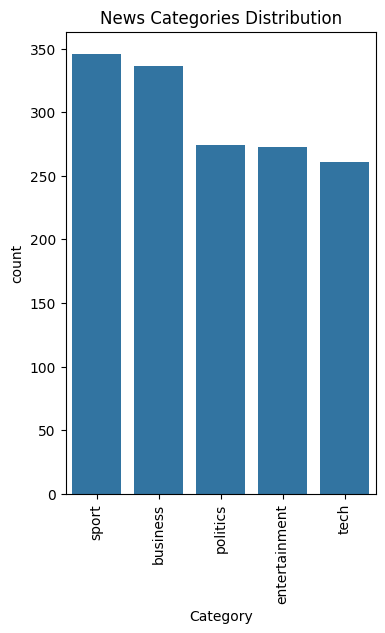

In [17]:
plt.figure(figsize=(4,6))
sns.countplot(data=df,x='Category',order=df['Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title("News Categories Distribution")
plt.show()

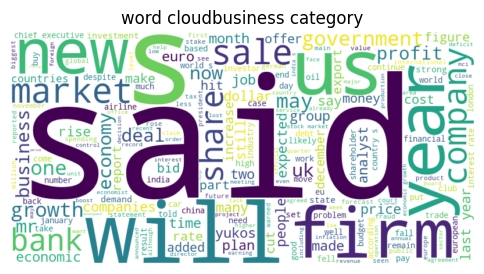

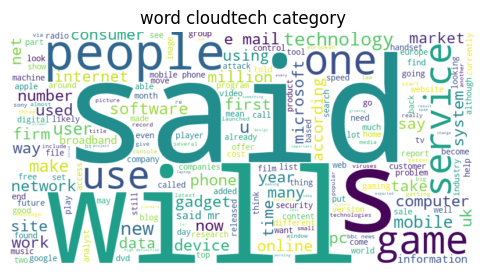

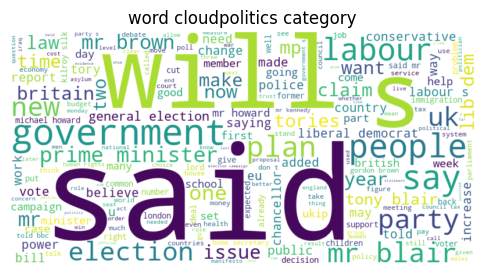

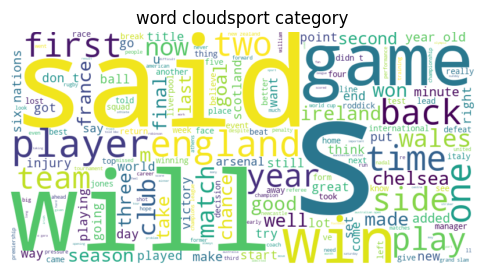

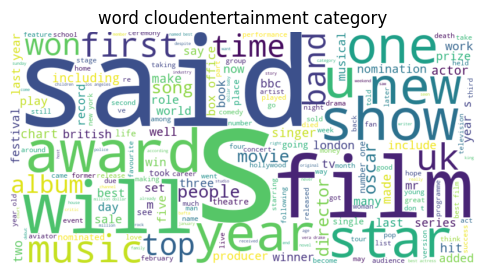

In [18]:
from wordcloud import WordCloud

for category in category_names:
    text=" ".join(df[df['Category']==category]['Text'].values)
    wordcloud=WordCloud(width=800,height=400,background_color="White").generate(text)
    plt.figure(figsize=(6,8))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f'word cloud{category} category')
    plt.axis('off')
    # plt.savefig(f'wordcloud for {category} category')
    plt.show()

In [19]:
# X=
# y=

In [20]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
import nltk 
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kritagya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kritagya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kritagya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kritagya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
lemmatizer=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))
# print(stop_words)


In [23]:
lemmatizer.lemmatize(word='sleeping',pos='v')

'sleep'

In [24]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    words = word_tokenize(text)
    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join back into a string
    return ' '.join(words)


In [25]:
# apply the funtion
text="hey there it so good to see you :) !"
print(preprocess_text(text))

hey good see


In [26]:
df['Text']=df['Text'].apply(preprocess_text)

In [27]:
X=df['Text']
y=df['Category']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.pipeline import make_pipeline
nb_model=make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
nb_model.fit(X_train,y_train)
y_pred_nb=nb_model.predict(X_test)
print(f'Accuracy={accuracy_score(y_true=y_test,y_pred=y_pred_nb)*100:.2f}')
print(f'classification report={classification_report(y_true=y_test,y_pred=y_pred_nb)}')

Accuracy=96.31
classification report=               precision    recall  f1-score   support

     business       0.96      0.97      0.97        75
entertainment       1.00      0.98      0.99        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.91      0.95        58

     accuracy                           0.96       298
    macro avg       0.97      0.96      0.96       298
 weighted avg       0.96      0.96      0.96       298



In [30]:
new_texts=[
    "The latest football match ended in a draw, with great performances from both teams",
    "The government announced new environmental policies aimed at reducing carbon emissions"
]
new_predictions=nb_model.predict(new_texts)

for text,predication in zip(new_texts,new_predictions):
    print(f'Text: {text}\n predicted category :{predication}')

Text: The latest football match ended in a draw, with great performances from both teams
 predicted category :sport
Text: The government announced new environmental policies aimed at reducing carbon emissions
 predicted category :politics


In [31]:

joblib.dump(nb_model,'nb_model.joblib')
print('success')

success
